In [202]:
import pandas as pd
import numpy as np

In [203]:
def get_max_obj(bd_cell):
    numeric_ids = pd.to_numeric(bd_cell, errors='coerce')
    return numeric_ids.max()


In [204]:
data_with_mono = pd.read_csv("БД_с_моно_full.csv", sep=';')
data_with_mono.head()

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Unnamed: 8,Unnamed: 9
0,383563,ж,46,30.09.2021,09.10.2021,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,#Н/Д,NaN,NaN
1,386318,ж,92,05.12.2021,05.01.2022,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,#Н/Д,NaN,NaN
2,238599,ж,55,08.07.2021,23.07.2021,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,#Н/Д,NaN,NaN
3,#Н/Д,м,70,11.06.2021,03.07.2021,ИНФ (тяжелое течение) с терапией без ЛП,Умер,#Н/Д,NaN,NaN
4,387627,м,74,07.01.2022,02.02.2022,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,#Н/Д,NaN,NaN


In [205]:
data_with_mono.isnull().sum()

CaseID           0
Gender           0
Age              0
Start            0
End              0
Ther             0
Outcome          0
Vacin            0
Unnamed: 8    2484
Unnamed: 9    2484
dtype: int64

In [206]:
#isnull только в последних, бесполезных для нас столбцах, поэтому можем их удалить

In [207]:
data_with_mono = data_with_mono.dropna(axis=1)

In [208]:
data_with_mono.isnull().sum()

CaseID     0
Gender     0
Age        0
Start      0
End        0
Ther       0
Outcome    0
Vacin      0
dtype: int64

In [209]:
data_without_mono = pd.read_csv("БД_без_моно_full.csv", sep=';')
data_without_mono.head()

,CaseID,Start,End,Gender,Age,Ther,Outcome,Vac,Unnamed: 8,Unnamed: 9
0,381492,06.08.2021,20.08.2021,ж,82.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет,NaN,NaN
1,386532,10.12.2021,15.12.2021,ж,65.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Умер,Нет,NaN,NaN
2,372366,11.11.2021,13.11.2021,м,76.0,ИНФ (тяжелое течение) без ЛП и терапии,Умер,Нет,NaN,NaN
3,379796,27.06.2021,05.07.2021,ж,72.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет,NaN,NaN
4,381175,28.07.2021,13.08.2021,ж,40.0,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,Нет,NaN,NaN


In [210]:
print(data_without_mono.shape, data_with_mono.shape)

#data_without_mono = data_without_mono.drop(data_without_mono.columns[-2:], axis=1)
data_without_mono = data_without_mono.drop(columns=["Unnamed: 8", "Unnamed: 9"])
data_without_mono = data_without_mono.drop(data_without_mono.index[-1])
data_without_mono.tail()


(6263, 10) (2484, 8)


,CaseID,Start,End,Gender,Age,Ther,Outcome,Vac
6257,388760,01.02.2022,09.02.2022,ж,61.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
6258,382154,25.08.2021,07.09.2021,ж,83.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
6259,384542,18.10.2021,27.10.2021,ж,21.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
6260,388468,27.01.2022,11.02.2022,ж,71.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
6261,385813,21.11.2021,07.12.2021,м,43.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет


In [211]:
data_indicator_F = pd.read_csv("Показатель_F.csv", sep=';')
data_indicator_D = pd.read_csv("Показатель_D.csv", sep=';')
data_indicator_D = data_indicator_D.drop(data_indicator_D.columns[-5:], axis=1)
data_indicator_F = data_indicator_F.drop(data_indicator_F.columns[-2:], axis=1)
data_indicator_F.head()

,Дата результата,IDS,Дата взятия,CaseID,Показатель_F,Результат
0,09.08.2021,886923,06.08.2021,381492,Ферритин,1146
1,13.12.2021,154296,10.12.2021,386532,Ферритин,"54,22"
2,14.02.2022,239389,13.02.2022,389577,Ферритин,"318,5"
3,12.11.2021,117155,11.11.2021,372366,Ферритин,1155
4,28.06.2021,838844,27.06.2021,379796,Ферритин,981


In [212]:
max_id = max(get_max_obj(data_indicator_F['CaseID']),get_max_obj(data_indicator_D['CaseID']),
             get_max_obj(data_without_mono['CaseID']),get_max_obj(data_with_mono['CaseID']))
max_id+=1
print(max_id)

#теперь заполним уникальными значениями оставшиеся поля:

390078


In [213]:
def replace_nan(x):
    global max_id
    if str(x) == "#Н/Д":
        max_id += 1
        return max_id
    return x
data_with_mono['CaseID'] = data_with_mono['CaseID'].map(replace_nan)
data_with_mono.head()
data_without_mono['CaseID'] = data_without_mono['CaseID'].map(replace_nan)
data_without_mono.tail()

,CaseID,Start,End,Gender,Age,Ther,Outcome,Vac
6257,388760,01.02.2022,09.02.2022,ж,61.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
6258,382154,25.08.2021,07.09.2021,ж,83.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
6259,384542,18.10.2021,27.10.2021,ж,21.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
6260,388468,27.01.2022,11.02.2022,ж,71.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
6261,385813,21.11.2021,07.12.2021,м,43.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет


In [214]:
#преобразуем object-type в date-type
data_with_mono['Start'] = pd.to_datetime(data_with_mono['Start'], dayfirst=True)
data_with_mono['End'] = pd.to_datetime(data_with_mono['End'], dayfirst=True)
data_without_mono['Start'] = pd.to_datetime(data_without_mono['Start'], dayfirst=True)
data_without_mono['End'] = pd.to_datetime(data_without_mono['End'], dayfirst=True)

In [215]:
#Сортируем по времени
data_with_mono = data_with_mono.sort_values('Start')
data_without_mono = data_without_mono.sort_values('Start')
#Оставляем только последнее нахождение в стационаре каждого уникального CaseID
data_with_mono = data_with_mono.drop_duplicates('CaseID', keep='last')
data_without_mono = data_without_mono.drop_duplicates('CaseID', keep='last')
data_without_mono.head()

,CaseID,Start,End,Gender,Age,Ther,Outcome,Vac
5755,390819,2021-05-07,2021-06-30,ж,79.0,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,#Н/Д
2120,390409,2021-05-11,2021-06-25,ж,49.0,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,#Н/Д
5581,390794,2021-05-20,2021-06-29,ж,65.0,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,#Н/Д
2380,390448,2021-05-21,2021-06-25,м,44.0,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,#Н/Д
5288,390760,2021-05-27,2021-06-25,ж,69.0,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,#Н/Д


In [216]:
#Меняем несовпадающие названия:
data_without_mono = data_without_mono.rename(columns={'Vac': 'Vacin'})

def merge_monos(with_mono, without_mono):
    print(without_mono.shape, with_mono.shape)
    without_mono.reindex(columns=['CaseID', 'Gender', 'Age', 'Start', 'End', 'Ther', 'Outcome', 'Vac'])
    with_mono['TherapyApply'] = 1
    without_mono['TherapyApply'] = 0
    result = pd.concat([with_mono, without_mono], axis=0, ignore_index=True)
    return result


dataFile = merge_monos(data_with_mono,data_without_mono) #соединяем таблицы with_mono и without_mono добавляя столбец <therapyApply>
                                                         #в зависимости от того, из какой таблицы взяты данные
dataFile.head()

(6153, 8) (2481, 8)


,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,TherapyApply
0,376917,ж,65.0,2021-05-08,2021-07-14,ИНФ (крайне тяжелое течение) с терапией без ЛП,Выписан,Нет,1
1,390158,м,73.0,2021-05-30,2021-07-14,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,Нет,1
2,390185,ж,57.0,2021-05-31,2021-07-14,ИНФ (крайне тяжелое течение) с терапией без ЛП,Умер,Нет,1
3,390093,ж,66.0,2021-06-01,2021-07-06,ИНФ (крайне тяжелое течение) с терапией без ЛП,Умер,Нет,1
4,390165,м,56.0,2021-06-01,2021-07-12,ИНФ (крайне тяжелое течение) с терапией без ЛП,Выписан,Спутник V,1


In [252]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8634 entries, 0 to 8633
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CaseID        8634 non-null   object        
 1   Gender        8634 non-null   object        
 2   Age           8634 non-null   float64       
 3   Start         8634 non-null   datetime64[ns]
 4   End           8634 non-null   datetime64[ns]
 5   Ther          8634 non-null   object        
 6   Outcome       8634 non-null   object        
 7   Vacin         8634 non-null   object        
 8   TherapyApply  8634 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 607.2+ KB


In [218]:
df = dataFile.query('Outcome=="Умер" or Outcome =="Выписан"') #оставляем только записи с известным исходом

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8498 entries, 0 to 8633
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CaseID        8498 non-null   object        
 1   Gender        8498 non-null   object        
 2   Age           8498 non-null   float64       
 3   Start         8498 non-null   datetime64[ns]
 4   End           8498 non-null   datetime64[ns]
 5   Ther          8498 non-null   object        
 6   Outcome       8498 non-null   object        
 7   Vacin         8498 non-null   object        
 8   TherapyApply  8498 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 663.9+ KB


In [220]:
#теперь поработаем с анализами

#отсортируем по времени и оставим только последний результат
data_indicator_F['Дата результата'] = pd.to_datetime(data_indicator_F['Дата результата'], dayfirst=True)
data_indicator_F['Дата взятия'] = pd.to_datetime(data_indicator_F['Дата взятия'], dayfirst=True)
data_indicator_F = data_indicator_F.sort_values('Дата результата')
data_indicator_F = data_indicator_F.drop_duplicates('CaseID', keep='last')
data_indicator_F.isna() 
# всего 18 пропусков. Причем пропуски по дате совпадают с пропусками по результату. ~18/10000. Удалим их
data_indicator_F = data_indicator_F.dropna(axis=0)
data_indicator_F.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10003 entries, 5265 to 6650
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Дата результата  10003 non-null  datetime64[ns]
 1   IDS              10003 non-null  int64         
 2   Дата взятия      10003 non-null  datetime64[ns]
 3   CaseID           10003 non-null  int64         
 4   Показатель_F     10003 non-null  object        
 5   Результат        10003 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 547.0+ KB


In [221]:
df=df.copy()
df['CaseID'] = df['CaseID'].astype('int64')
df = df.merge(data_indicator_F[['CaseID', 'Результат']], 
                 on='CaseID', 
                 how='left')

df = df.rename(columns={"Результат": "Результат_F"})

In [222]:
df.isna().sum() #819 пропусков.

CaseID            0
Gender            0
Age               0
Start             0
End               0
Ther              0
Outcome           0
Vacin             0
TherapyApply      0
Результат_F     819
dtype: int64

In [223]:
#удалим все повторения
data_indicator_D = data_indicator_D.drop_duplicates('CaseID', keep='last')
#а затем соединим
df = df.merge(data_indicator_D[['CaseID', 'Результат_D']], 
                 on='CaseID', 
                 how='left')

In [224]:
df['Результат_F']=df['Результат_F'].str.replace(',','.')
df['Результат_F'] = df['Результат_F'].astype('float')

In [225]:
df['Результат_D']=df['Результат_D'].str.replace(',','.')
df['Результат_D']=df['Результат_D'].str.replace('>','')
df['Результат_D'] = pd.to_numeric(df['Результат_D'], errors='coerce')
df.isna().sum() #819 и 907 пропусков.

CaseID            0
Gender            0
Age               0
Start             0
End               0
Ther              0
Outcome           0
Vacin             0
TherapyApply      0
Результат_F     819
Результат_D     907
dtype: int64

In [226]:
df.describe()

,CaseID,Age,Start,End,TherapyApply,Результат_F,Результат_D
count,8498.000000,8498.000000,8498,8498,8498.000000,7679.000000,7591.000000
mean,354887.278771,65.098847,2021-10-01 01:23:32.379383296,2021-10-13 13:42:10.760178688,0.288421,785.881866,905.611685
min,66.000000,18.000000,2021-05-07 00:00:00,2021-06-25 00:00:00,0.000000,1.000000,0.100000
25%,380519.250000,54.000000,2021-07-29 00:00:00,2021-08-12 00:00:00,0.000000,286.050000,227.300000
50%,383615.500000,67.000000,2021-10-03 00:00:00,2021-10-13 00:00:00,0.000000,673.600000,469.500000
75%,386630.500000,79.000000,2021-11-28 00:00:00,2021-12-11 00:00:00,1.000000,1220.000000,1211.000000
max,390866.000000,100.000000,2022-02-18 00:00:00,2022-02-21 00:00:00,1.000000,17752.000000,8834.000000
std,81542.816133,16.603246,NaN,NaN,0.453055,597.812622,981.350779


In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

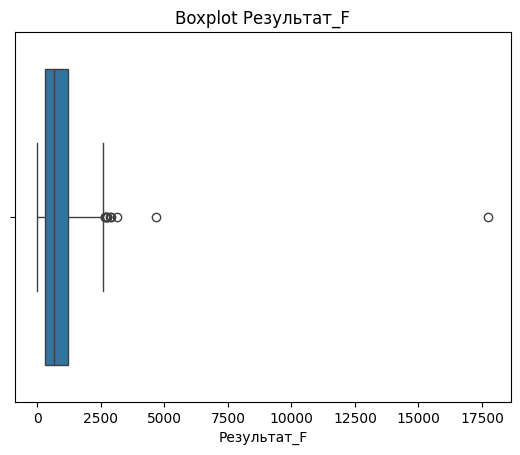

In [228]:
sns.boxplot(x=df['Результат_F'])
plt.title('Boxplot Результат_F')
df.loc[df['Результат_F'] > 17500, 'Результат_F'] = np.nan
plt.show()

In [229]:

df.describe()

,CaseID,Age,Start,End,TherapyApply,Результат_F,Результат_D
count,8498.000000,8498.000000,8498,8498,8498.000000,7678.000000,7591.000000
mean,354887.278771,65.098847,2021-10-01 01:23:32.379383296,2021-10-13 13:42:10.760178688,0.288421,783.672161,905.611685
min,66.000000,18.000000,2021-05-07 00:00:00,2021-06-25 00:00:00,0.000000,1.000000,0.100000
25%,380519.250000,54.000000,2021-07-29 00:00:00,2021-08-12 00:00:00,0.000000,286.025000,227.300000
50%,383615.500000,67.000000,2021-10-03 00:00:00,2021-10-13 00:00:00,0.000000,673.450000,469.500000
75%,386630.500000,79.000000,2021-11-28 00:00:00,2021-12-11 00:00:00,1.000000,1219.500000,1211.000000
max,390866.000000,100.000000,2022-02-18 00:00:00,2022-02-21 00:00:00,1.000000,4662.000000,8834.000000
std,81542.816133,16.603246,NaN,NaN,0.453055,565.620539,981.350779


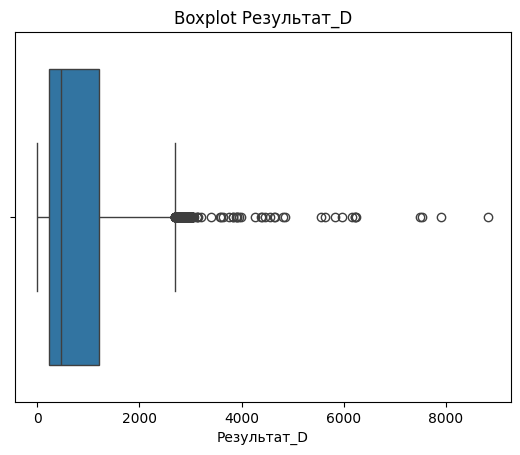

In [230]:
sns.boxplot(x=df['Результат_D'])
plt.title('Boxplot Результат_D')
plt.show()

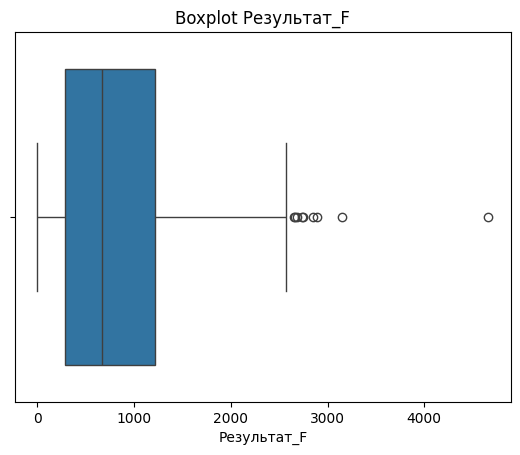

In [231]:
sns.boxplot(x=df['Результат_F'])
plt.title('Boxplot Результат_F')
plt.show()

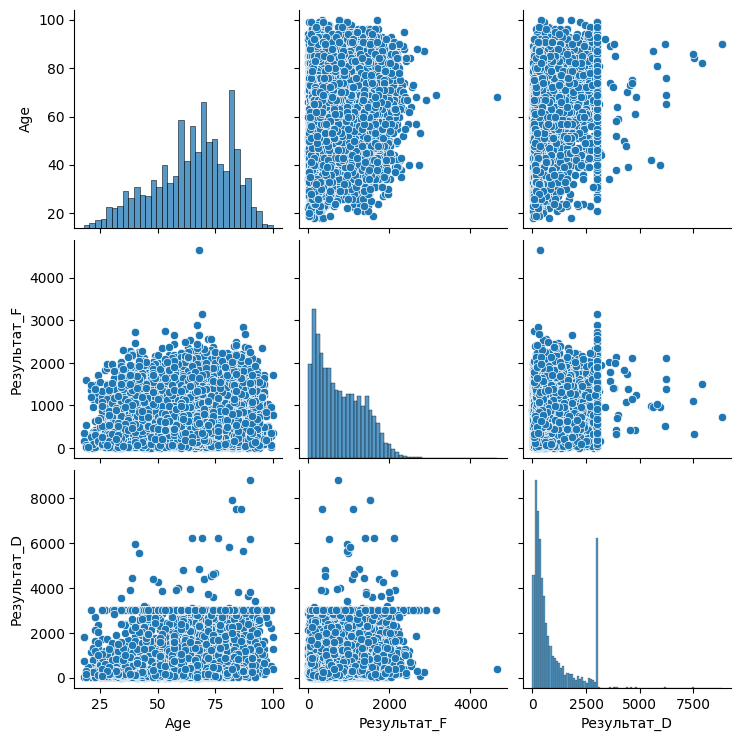

In [232]:
sns.pairplot(df[['Age','Результат_F','Результат_D']])

In [233]:
#возникла проблема, когда мы заменили все значения '>3000' на '3000'. Тут очевидно в результате_d - экспоненциальное распределение
#поэтому починим это

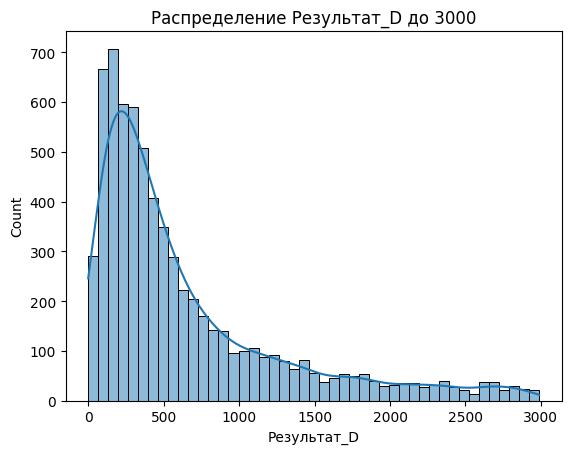

In [234]:
#Изучим наше распределение до 3000
data_below_3000 = df[df['Результат_D'] < 3000]['Результат_D'].dropna()
sns.histplot(data_below_3000, kde=True)
plt.title('Распределение Результат_D до 3000')
plt.show()

In [235]:
count_3000 = len(df[df['Результат_D'] == 3000])
lambda_param = 1 / data_below_3000.mean()
print(f"Оценка λ для экспоненциального распределения: {lambda_param:.4f}")
print(f"Количество значений, которые >3000 = {count_3000}")
lambda_param= 0.00075

Оценка λ для экспоненциального распределения: 0.0015
Количество значений, которые >3000 = 767


In [236]:
np.random.seed(40)  # Для воспроизводимости

# Список индексов, где Результат_D = 3000
indices_3000 = df[df['Результат_D'] == 3000].index

# Генерация новых значений (сдвиг на 3000)
new_values = (np.random.exponential(scale=1/lambda_param, size=count_3000)) + 3000
new_values = np.clip(new_values, 3000, 9000)
new_values = np.round(new_values, decimals=2)
# Замена значений
df.loc[indices_3000, 'Результат_D'] = new_values

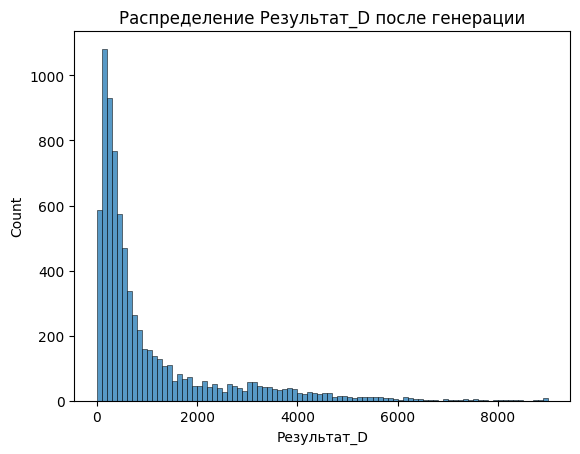

In [237]:
sns.histplot(df['Результат_D'].dropna())
plt.title('Распределение Результат_D после генерации')
plt.show()

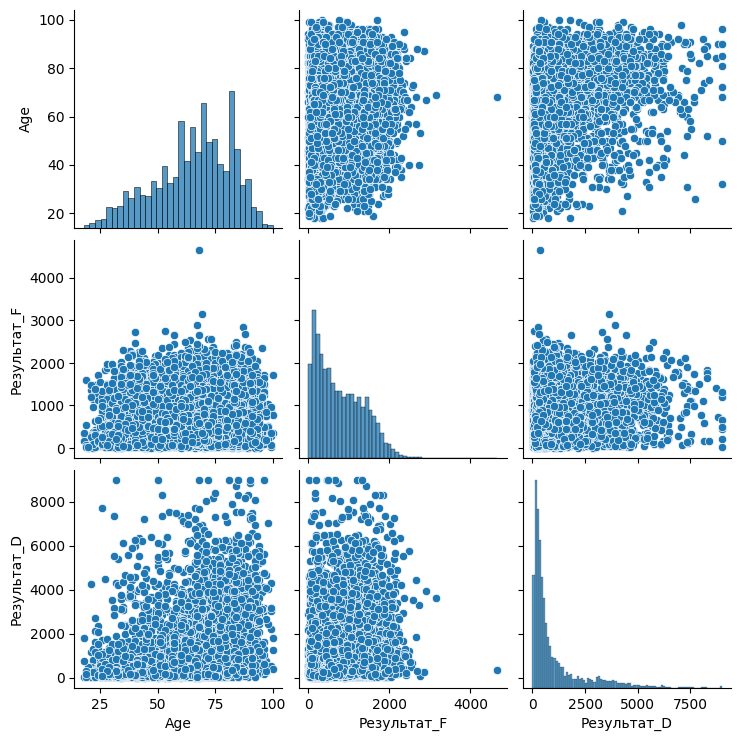

In [238]:
sns.pairplot(df[['Age','Результат_F','Результат_D']])

In [239]:
#далее, заполним пустые столбцы

In [240]:
age_categories = [18, 40, 55, 65, 75, 100]
labels = ['18–39', '40–54', '55–64', '65–74', '75–100']
#поделим на данные возрастные категории
toGroup = df.copy()
toGroup['AgeGroup'] = pd.cut(toGroup['Age'], bins=age_categories, labels=labels, include_lowest=True) #разделим наши возраста по возрастным группам
toGroup.head()

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,TherapyApply,Результат_F,Результат_D,AgeGroup
0,376917,ж,65.0,2021-05-08,2021-07-14,ИНФ (крайне тяжелое течение) с терапией без ЛП,Выписан,Нет,1,135.9,423.9,55–64
1,390158,м,73.0,2021-05-30,2021-07-14,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,Нет,1,NaN,NaN,65–74
2,390185,ж,57.0,2021-05-31,2021-07-14,ИНФ (крайне тяжелое течение) с терапией без ЛП,Умер,Нет,1,NaN,NaN,55–64
3,390093,ж,66.0,2021-06-01,2021-07-06,ИНФ (крайне тяжелое течение) с терапией без ЛП,Умер,Нет,1,NaN,NaN,65–74
4,390165,м,56.0,2021-06-01,2021-07-12,ИНФ (крайне тяжелое течение) с терапией без ЛП,Выписан,Спутник V,1,NaN,NaN,55–64


In [241]:
grouped = toGroup.groupby(['Gender', 'AgeGroup'],observed=True) #сгруппируем элементы по полу и возрастной группе

In [242]:
print(grouped.size())
#Как видим, распределение получилось примерно равномерным у мужчин. И смещением к чему-то экспоненциальному у женщин

Gender  AgeGroup
ж       18–39        418
        40–54        695
        55–64        952
        65–74       1288
        75–100      1743
м       18–39        446
        40–54        693
        55–64        698
        65–74        835
        75–100       730
dtype: int64


In [243]:
df['Результат_D'] = toGroup.groupby(['Gender', 'AgeGroup'], observed=True)['Результат_D'].transform(lambda x: x.fillna(round(x.median(), 2)))
df['Результат_F'] = toGroup.groupby(['Gender', 'AgeGroup'], observed=True)['Результат_F'].transform(lambda x: x.fillna(round(x.median(), 2)))

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8498 entries, 0 to 8497
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CaseID        8498 non-null   int64         
 1   Gender        8498 non-null   object        
 2   Age           8498 non-null   float64       
 3   Start         8498 non-null   datetime64[ns]
 4   End           8498 non-null   datetime64[ns]
 5   Ther          8498 non-null   object        
 6   Outcome       8498 non-null   object        
 7   Vacin         8498 non-null   object        
 8   TherapyApply  8498 non-null   int64         
 9   Результат_F   8498 non-null   float64       
 10  Результат_D   8498 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 730.4+ KB


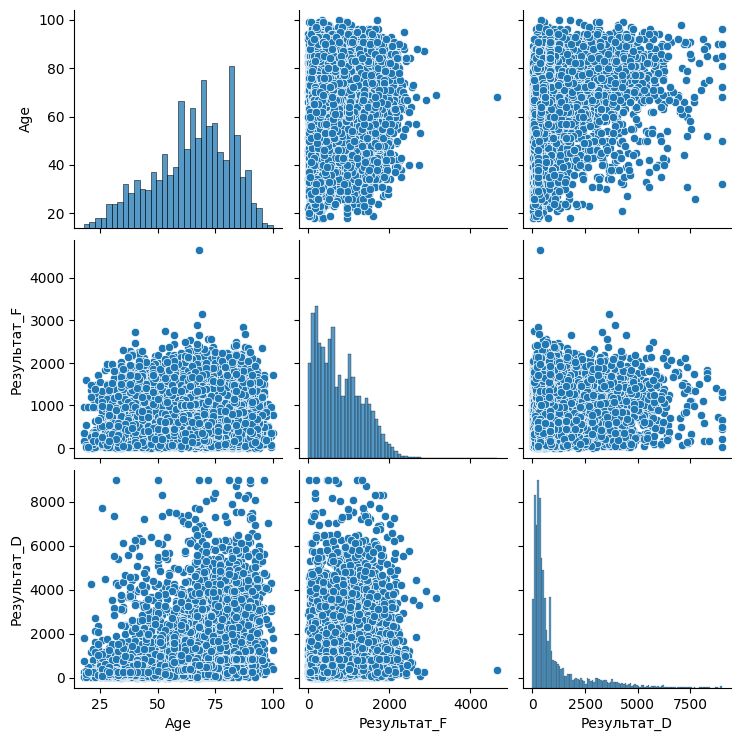

In [245]:
sns.pairplot(df[['Age','Результат_F','Результат_D']])

In [246]:
#В нашем столбце Ther содержится слишком много данных. разделим его.
#на тяжесть заболевания и прием ЛП

In [247]:
conditions1 = [
    df['Ther'].str.contains('ИНФ \(крайне тяжелое течение\)'),
    df['Ther'].str.contains('среднетяжелое'),
    df['Ther'].str.contains('тяжелое')
]
choices1 = ['Крайне тяжелое', 'Среднетяжелое', 'Тяжелое']
df['Severity'] = np.select(conditions1, choices1, default='Unknown')

df['Meds'] = np.where(df['Ther'].str.contains('без ЛП', na=False), 0, 1)

#Убираем отсутствие данных в вакцинах
df['Vacin']=df['Vacin'].replace({'#Н/Д':'Нет'})

#добавляем сроки госпитализации
df['Duration'] = (df['End'] - df['Start']).dt.days

df=df.drop('Start',axis=1)
df=df.drop('End',axis=1)

In [248]:
df=df.drop(columns=["Ther"])

In [249]:
df.tail()

,CaseID,Gender,Age,Outcome,Vacin,TherapyApply,Результат_F,Результат_D,Severity,Meds,Duration
8493,390228,м,64.0,Умер,Нет,0,1013.0,417.30,Тяжелое,0,0
8494,389763,ж,91.0,Умер,Нет,0,1705.0,900.10,Тяжелое,0,3
8495,389824,ж,84.0,Умер,Нет,0,1734.0,853.60,Тяжелое,0,1
8496,389919,ж,91.0,Умер,Нет,0,754.9,853.60,Тяжелое,0,1
8497,389893,м,95.0,Умер,Нет,0,1192.0,802.75,Тяжелое,0,1


In [250]:
df.to_csv('processed_data.csv', encoding='utf-8-sig', index=False, sep=";")

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8498 entries, 0 to 8497
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CaseID        8498 non-null   int64  
 1   Gender        8498 non-null   object 
 2   Age           8498 non-null   float64
 3   Outcome       8498 non-null   object 
 4   Vacin         8498 non-null   object 
 5   TherapyApply  8498 non-null   int64  
 6   Результат_F   8498 non-null   float64
 7   Результат_D   8498 non-null   float64
 8   Severity      8498 non-null   object 
 9   Meds          8498 non-null   int64  
 10  Duration      8498 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 730.4+ KB
